# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [3]:
center_info = pd.read_csv(r'Dataset/fulfilment_center_info.csv')
meal_info = pd.read_csv(r'Dataset/meal_info.csv')
train_data = pd.read_csv(r'Dataset/train.csv')
test_data = pd.read_csv(r'Dataset/test.csv')

# Exploratory Data Analysis

In [4]:
center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [7]:
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [8]:
print(train_data.shape, test_data.shape)

(456548, 9) (32573, 8)


In [9]:
train_data.num_orders.describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [10]:
(train_data.center_id.unique())

array([ 55,  24,  11,  83,  32,  13, 109,  52,  93, 186, 146,  57, 149,
        89, 124, 152,  97,  74, 108,  99,  66,  94,  91,  20,  34, 137,
        92, 126,  36, 162,  75, 177,  27, 157, 106,  64, 129,  14,  17,
       153, 139, 161,  81,  26,  73,  50, 104,  42, 113, 145,  53,  72,
        67, 174,  29,  77,  41,  30,  76,  59,  88, 143,  58,  10, 101,
        80,  43,  65,  39, 102, 110, 132,  23,  86,  68,  51,  61])

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


# Checking For Null Values

In [12]:
print(train_data.isnull().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64


In [13]:
print(train_data.isna().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64


# Merge Datasets

In [14]:
final_train = pd.merge(train_data, meal_info, on="meal_id", how="outer")
final_train = pd.merge(final_train, center_info, on="center_id", how="outer")
final_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


# Dropping columns

In [15]:
final_train = final_train.drop(['center_id', 'meal_id'], axis=1)
final_train.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [16]:
cols = final_train.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [17]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [18]:
final_train = final_train[cols]
final_train.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

Object data have to be Label Encoded before proceeding to Model fitting

# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

final_train['center_type'] = le.fit_transform(final_train['center_type'])
final_train['category'] = le.fit_transform(final_train['category'])
final_train['cuisine'] = le.fit_transform(final_train['cuisine'])

In [20]:
final_train.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,3,146.50,147.50,0,0,215


In [21]:
final_train.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type                int64
op_area                  float64
category                   int64
cuisine                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

Now, all the attributes have only numerical values

# Data Visualization

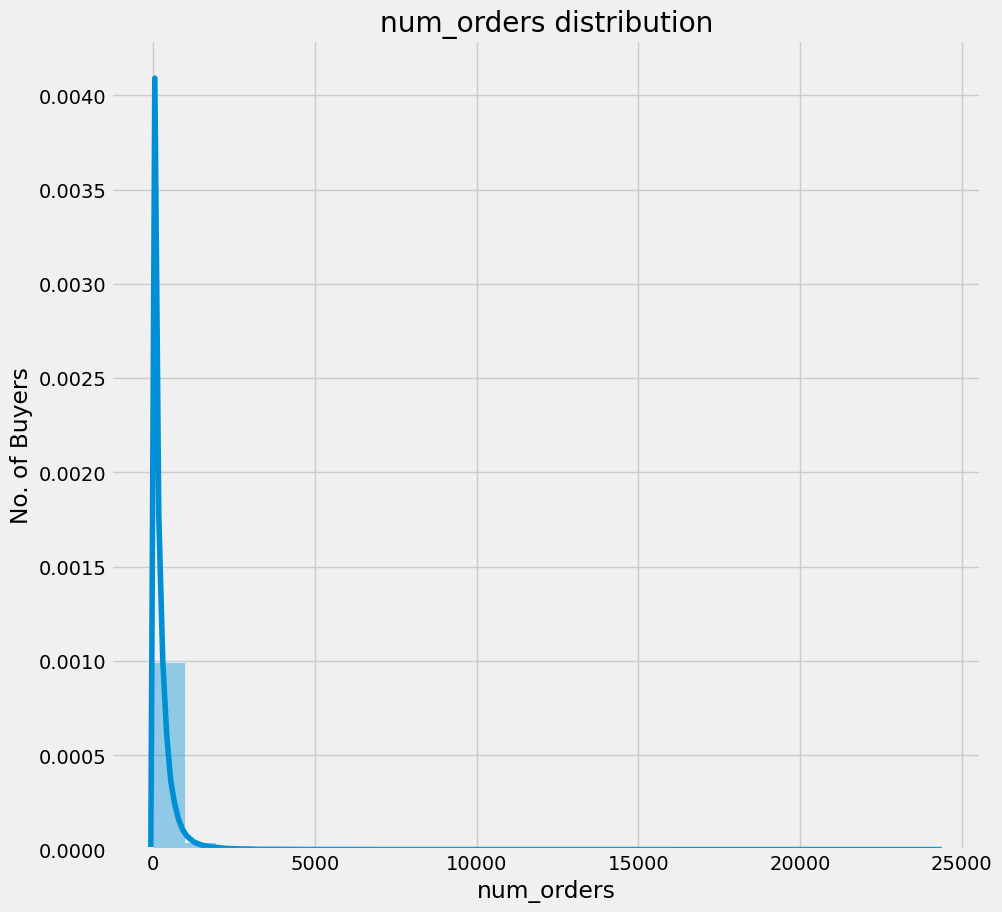

In [22]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,10))

sns.distplot(final_train.num_orders, bins = 25)
plt.xlabel('num_orders')
plt.ylabel("No. of Buyers")
plt.title("num_orders distribution")
plt.show()

In [23]:
final_train_2 = final_train.drop(['id'], axis=1)
correlation = final_train_2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns 

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

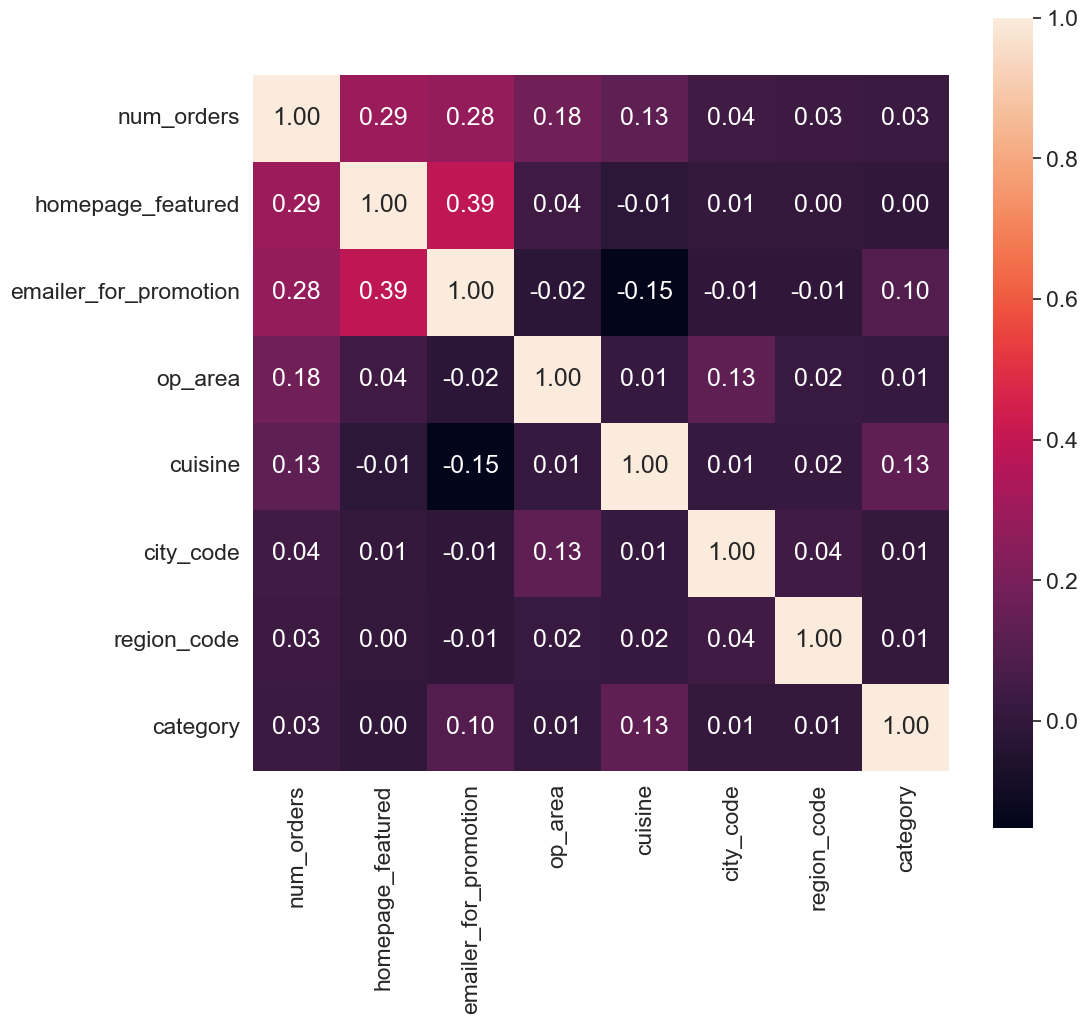

In [24]:
correlation_map = np.corrcoef(final_train_2[columns].values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()

# Split Dependant and Independant variables

In [25]:
features = columns.drop(['num_orders'])
final_train_3 = final_train[features]
X = final_train_3.values
y = final_train['num_orders'].values

In [26]:
final_train_3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


In [27]:
final_train_3.describe()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
count,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,0.10920,0.081152,4.083590,1.561961,601.553399,56.614566,5.257443
std,0.31189,0.273069,1.091686,1.101974,66.195914,17.641306,4.459965
min,0.00000,0.000000,0.900000,0.000000,456.000000,23.000000,0.000000
25%,0.00000,0.000000,3.600000,1.000000,553.000000,34.000000,0.000000
50%,0.00000,0.000000,4.000000,2.000000,596.000000,56.000000,5.000000
75%,0.00000,0.000000,4.500000,3.000000,651.000000,77.000000,9.000000
max,1.00000,1.000000,7.000000,3.000000,713.000000,93.000000,13.000000


# Splitting the data as train and test

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
X_train

array([[  0. ,   0. ,   4. , ..., 675. ,  34. ,   0. ],
       [  0. ,   0. ,   4.5, ..., 713. ,  85. ,  11. ],
       [  0. ,   0. ,   2. , ..., 647. ,  56. ,   0. ],
       ...,
       [  0. ,   0. ,   4.8, ..., 556. ,  77. ,   1. ],
       [  0. ,   0. ,   5.3, ..., 659. ,  77. ,  11. ],
       [  1. ,   1. ,   4. , ..., 526. ,  34. ,   7. ]])

In [30]:
X_test

array([[  0. ,   0. ,   2.4, ..., 478. ,  77. ,   0. ],
       [  0. ,   0. ,   3.8, ..., 526. ,  34. ,   9. ],
       [  0. ,   0. ,   4.2, ..., 456. ,  56. ,   0. ],
       ...,
       [  0. ,   0. ,   5.1, ..., 590. ,  56. ,   3. ],
       [  0. ,   0. ,   5.1, ..., 590. ,  56. ,   9. ],
       [  0. ,   0. ,   4. , ..., 522. ,  56. ,   9. ]])

# Model Building
Train and Test the model algorithms

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.svm import SVR

from sklearn import metrics

In [32]:
svr = SVR()
svr.fit(X_train,y_train)

y_pred = svr.predict(X_test)
y_pred[y_pred<0] = 0
print("SVR RMSLE: ", 100 * np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
print("SVR RMSLE: ", 100 * np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))

SVR RMSLE:  120.46464153748279
SVR RMSLE:  129.95606986454357


In [33]:
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)
y_pred[y_pred<0] = 0
print("LogR RMSLE: ", 100 * np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
print("LogR RMSLE: ", 100 * np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))

LogR RMSLE:  249.52890494415368
LogR RMSLE:  88.86633648623157


In [34]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred[y_pred<0] = 0
print("RF RMSLE: ", 100 * np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
print("RF RMSLE: ", 100 * np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))

RF RMSLE:  62.866118608812684
RF RMSLE:  84.41292567546229


In [35]:
xg = XGBRegressor()
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
y_pred[y_pred<0] = 0
print("XGBRegressor RMSLE: ", 100 * np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
print("XGBRegressor RMSLE: ", 100 * np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))

XGBRegressor RMSLE:  70.52456948582993
XGBRegressor RMSLE:  86.64315606075462


In [36]:
LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)
y_pred[y_pred<0] = 0
print("Linear Regression RMSLE : ", 100 * np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
print("Linear Regression RMSLE : ", 100 * np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))

Linear Regression RMSLE :  129.8041711375772
Linear Regression RMSLE :  159.5374424709577


In [37]:
L = Lasso()
L.fit(X_train, y_train)

y_pred = L.predict(X_test)
y_pred[y_pred<0]=0
print("Lasso Regression RMSLE : ", 100 * np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
print("Lasso Regression RMSLE : ", 100 * np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))

Lasso Regression RMSLE :  129.5156271994047
Lasso Regression RMSLE :  159.95837803724322


In [38]:
EN = ElasticNet()
EN.fit(X_train, y_train)

y_pred = EN.predict(X_test)
y_pred[y_pred<0] = 0
print("Elastic Regression RMSLE : ", 100 * np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
print("Elastic Regression RMSLE : ", 100 * np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))

Elastic Regression RMSLE :  131.61832110565067
Elastic Regression RMSLE :  172.78321578167686


In [39]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)
y_pred[y_pred<0] = 0
print("Decision Tree Regressor RMSLE : ", 100 * np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
print("Decision Tree Regressor RMSLE : ", 100 * np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))

Decision Tree Regressor RMSLE :  62.87510845046052
Decision Tree Regressor RMSLE :  84.42006393163096


In [40]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)
y_pred[y_pred<0] = 0
print("KNeighbors Regressor RMSLE : ", 100 * np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
print("KNeighbors Regressor RMSLE : ", 100 * np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))

KNeighbors Regressor RMSLE :  67.43196191719801
KNeighbors Regressor RMSLE :  87.30074137232225


In [41]:
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)

y_pred = GB.predict(X_test)
y_pred[y_pred<0] = 0
print("Gradient Boosting Regressor RMSLE : ", 100 * np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
print("Gradient Boosting Regressor RMSLE : ", 100 * np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))

Gradient Boosting Regressor RMSLE :  100.39367996250166
Gradient Boosting Regressor RMSLE :  104.4495049458805


K Fold Cross Validation
- The purpose of cross–validation is to test the ability of a machine learning model to predict new data. 
- It is also used to flag problems like overfitting or selection bias and gives insights on how the model will generalize to an independent dataset.

XBG Regressor seems to give us a cross validation better score. Lets tune the model a bit.

Hyperparameter tuning takes advantage of the processing infrastructure of Google Cloud to test different hyperparameter configurations when training your model. It can give you optimized values for hyperparameters, which maximizes your model's predictive accuracy.

# Save the model

In [ ]:
# import pickle
# pickle.dump(DT, open('demandest.pkl', 'wb'))